## CSCI-UA 9473 Final Assignment

Total: 55pts

In this last assignment, you will get to work on each of the learning frameworks that we introduced throughout the course. The assignement is organized in Three main parts.

- Supervised Learning
- Unsupervised Learning
- Reinforcement Learning 

The Total (final) grade will be computed according to the following rule 



__if__ Mean(Assignment1,Assignment2,Assignment3)< Assignment4 

    
    Total grade = 0.25*Mean(Assignment1+Assignment2+Assignment3) + 0.75*Assignment4
    
__else if__ Mean(Assignment1,Assignment2,Assignment3)> Assignment4 

    
    Total grade = 0.75*Mean(Assignment1+Assignment2+Assignment3) + 0.25*Assignment4
    
    

### Part I. Supervised Learning (25pts)

#### Exercise I.1.1 Regression tree (5pts)

Tree based methods are simple methods that can be used in both regression and classification. The idea is to split the space into regions and then approximate the data by taking the mean of the targets from each region. The approach starts by splitting the space into two regions $R_1$ and $R_2$. Each of the two regions is then itself split into two more regions, $R_{11}$, $R_{12}$ such that $R_{11}\cup R_{12} = R_{1}$ and $R_{21}$, $R_{22}$ such that $R_{21}\cup R_{22} = R_{2}$. By proceeding like this, we end up with a model of the form

$$f(x) = \sum_{m=1}^M c_m I(x\in R_m)$$

where $I(x\in R_m)$ is a function that takes the value $1$ when $x$ belongs to the subregion $R_m$ and $0$ otherwise. 

if we minimize the sum of squares, one can show that the optimal value for the coefficients $c_m$ is the average of the targets from region $R_m$, i.e. 

$$\hat{c}_m = \frac{1}{N_m}\sum_{x_i\in R_m} t_i$$

Now finding the optimal region separation is more tricky. For this reason, the algorithm usually relies on some greedy procedure. 

For a splitting value $s$, Let $R_1(j,s)$ and $R_2(j,s)$ denote the regions we want to get (with respect to the coordinate/feature $j$), i.e. $R_1(j,s) = \left\{\mathbf{x}|x_j\leq s\right\} $ and $R_2(j,s) = \left\{\mathbf{x}|x_j>s\right\}$.

In order to find the optimal value $s$, we solve the following problem

$$\min_{(j,s)} \left[\min_{c_1} \sum_{\mathbf{x}_i\in R_1(j,s)} (t_i - c_1)^2 + \min_{c_2} \sum_{\mathbf{x}_i\in R_2(s,j)} (t_i - c_2)^2\right]\quad (*)$$

As explained before, we can take $c_1$ and $c_2$ to be the averages of the targets from each region. To determine the split, for convenience, we can take it to happen at one of the points from the training set, $\mathbf{s} = \mathbf{x}_i$ for some $i\in \mathcal{D}$. From this computing the optimal splitting for the criterion (*) becomes easier as we are left with computing the value of this criterion for $s = \mathbf{x}_i$ given by any of the points from the training set. And return the value that achieves the minimum.  

Consider the dataset below. Compute the Regression tree for this dataset. You can stop when you reach a certain node size (take it to be $2$ for example)

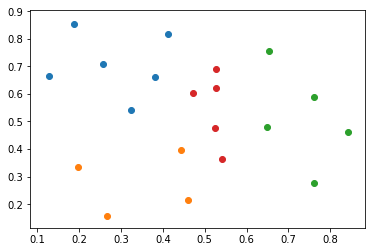

In [31]:
from scipy.io import loadmat
Points1 = loadmat('Points1_ExTree.mat')
Points2 = loadmat('Points2_ExTree.mat')
Points3 = loadmat('Points3_ExTree.mat')
Points4 = loadmat('Points4_ExTree.mat')


Points1 = Points1['Points1_ExTree']
Points2 = Points2['Points2_ExTree']
Points3 = Points3['Points3_ExTree']
Points4 = Points4['Points4_ExTree']


import matplotlib.pyplot as plt
plt.scatter(Points1[:,0], Points1[:,1])
plt.scatter(Points2[:,0], Points2[:,1])
plt.scatter(Points3[:,0], Points3[:,1])
plt.scatter(Points4[:,0], Points4[:,1])
plt.show()


target_1 = np.ones(np.shape(Points1)[0])+np.random.normal(0, 0.2, np.shape(Points1)[0])
target_2 = 2*np.ones(np.shape(Points1)[0])+np.random.normal(0, 0.2, np.shape(Points1)[0])
target_3 = 5*np.ones(np.shape(Points1)[0])+np.random.normal(0, 0.2, np.shape(Points1)[0])
target_4 = -3*np.ones(np.shape(Points1)[0])+np.random.normal(0, 0.2, np.shape(Points1)[0])



In [ ]:
# put your code here




#### Exercise I.1.2. Weakest link (5pts)

Once we have built a sufficiently deep tree, we are left with determining whether one cannot reduce the depth of this tree (i.e. how coarse the model can be while still achieving sufficient accuracy). A (too) fine model will obviously lead to overfitting. For any tree, we define the set of leaf nodes (i.e. final set of regions) as $M$. We will use this parameter to encode the complexity of the tree. 

We can define the error that we make with a particular tree by considering the error on each region and summing those error terms across each region. If we let $R_m$ to denote the (average) error induced by region $R_m$, 

$$Q_m(T) = \frac{1}{N_m} \sum_{x_i\in R_m} (t_i - \hat{c}_m)^2$$

To account for the complexity of the tree, one can also extend this cost into a loss $\ell(T)$ which penalize complex trees (with a large number of leaf nodes $M$) as

$$\ell(T) = \sum_{m=1}^M N_m Q_m(T) + \alpha M$$

We can then look for the optimal tree for any particular value of $\alpha$. 

The search for the optimal $\alpha$ and the associated tree is usually done through a procedure known as _weakest link prunning_ which works as follows 

For any node other than the leaf nodes, we can study how much of an improvement one can get by deleting the subtree located below the node. To do this, we proceed as follows. For any given subtree, we can define the costs $\tilde{R}(t) = Q(t) + \alpha$ and $R(T_t) = Q(T_t) + \alpha|T_t|$. The first one is the cost of the node $t$ (that is the contribution if we removed the whole subtree below $t$) and the second one is the contribution of the term if we were to keep all the leaf of the subtree. For each node in $T_0$, we can look for the $\alpha$ at which $R(T_t)>R(t)$. In other words, we look for the value $\alpha$ such that 

$$Q(t) + \alpha < Q(T_t) + \alpha|T_t|$$

This is equivalent to looking for the  $\alpha$ such that $\alpha>\frac{Q(t)-Q(T_t)}{|T_t|-t}$. We can do this for every node $t$. The _weakest link_ $t'$ is then the connection for which the $\alpha(t')$ is the smallest. If there are multiple nodes achieving the same minimum we remove all the sub-branches associated to those nodes. We define the next subtree by removing the sub-branches for _Weakest link_ $t'$. Let us denote that subtree as $T'$. We then repeat the procedure on $T'$, looking for the nodes with smallest $\alpha$. The procedure generates a sequence of subtrees $T, T', T''$ with associated values $\alpha_0, \alpha_1, \ldots$. 

Implement _weakest link prunning_ below. 

In [ ]:
import numpy as np




#### Exercise I.1.3. Cross validation (5pts)

Given the sequence of subtrees $T_0,T_1, T_2,\ldots$ and its accompanying sequence of weights $\alpha_0,\alpha_1,\ldots$, one can show that the sequence contains the optimal $\alpha^*$. To find this $\alpha^*$, one can use $k$-fold cross validation. 

Divide the dataset into $K$ bins of size $N/K$. For each of those bins, we will use one bin as our validation/test set and the remaining $K-1$ bins as our training set. 

1- Using the training set, compute the tree for each of the values of $\alpha$ obtained above. You don't need to optimize anything as the value on a region is defined as the average of the targets in this region and the number of levels can be set by only retaining those subtrees for which $R_\alpha(t)>R_{\alpha}(T_t)$

2-Once you have computed all the subtrees, evaluate the prediction error for those subtrees on the set consisting of the remaining $K$ points. The prediction error is just the average target ($c_m$) from the region in which the new points is located minus the true target of this point.

And compute the average error as 

$$E(\alpha) = \frac{1}{N}\sum_{i=1}^N (\text{prediction}_{T_k(\alpha)}(\mathbf{x}_i) - t_i)^2$$

where $N$ is the total number of points in the dataset and $\text{prediction}_{T_k}$ is the prediction obtained on the tree $T_k(\alpha)$ learned on the set of $N - K$ points to which $\mathbf{x}_i$ did not belong (i.e. learned without $\mathbf{x}_i$)


Select the $\alpha$ which gives the smallest error.

Take $k$ between $2$ and $4$ and find the optimal $\alpha$. 

In [ ]:
# put your code here



#### Exercise I.2. Bias-Variance (10pts)

In this exercise, we will study the decomposition of the prediction error into the bias and variance contribution for a simple regression model. For a given learning model, the prediction error can read as

$$\mathbb{E}\left\{(f(\mathbf{x},\theta)) - t(\mathbf{x}))^2\right\}$$

After some calculation, this expression can reduce to

$$\mathbb{E}_D\left\{(f_D(\mathbf{x},\theta)) - t(\mathbf{x}))^2\right\} = \left(\mathbb{E}\left\{f_d(\mathbf{x}, \theta)\right\} - t(\mathbf{x})\right)^2 + \mathbb{E}_D\left\{\left(f_D(\mathbf{x}; \theta) - \mathbb{E}_D\left\{f_D(\mathbf{x}, \theta)\right\}\right)^2\right\}$$

In this expression, the first term represents the squared bias (that is how much the choice of the family of models we pick differs is able to capture of the measurements we have on average). In the second term, you can recognize the expression of the variance. This second term captures how much the models vary within a particular family of models when we change the subset $D$ on which we learn the models. 


In this exercise, we will illustrate this decomposition. for a simple regression model on noisy degree $3$ datasets with model of degrees from $0$ to $5$

Consider the noisy dataset below. For the sake of the exercise, we will not change the dataset each time when computing the average, but rather just generate new points by changing the noise. 

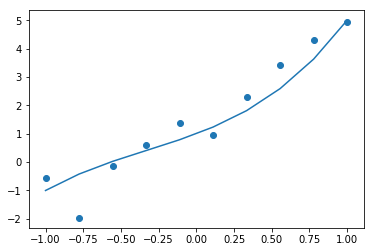

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,10)
y = x**3 + x**2 + 2*x + 1

numTest = 400

ynoisy = y +np.random.normal(0,.6,len(x))

plt.scatter(x, ynoisy)
plt.plot(x, y)
plt.show()

To represent the three terms (bias, variance and Mean Squared Error) code the following steps 

__1.__ We will write two nested loops. The first one on the maximum degree of the regression model. The second one on the number of experiments. For each experiments we will generate new points as we did above but with a different noise vector. That is re-use a line of the form ynoisy = y +np.random.normal(0,.6,len(x)) for each XP   


__2.__ In each experiment, for each maximum degree of the regression model (0,1,..5), generate the polynomial features up to this degree and learn the regression model on the noisy points with the LinearRegression function from scikit (just use the plain simple synthax : LinearRegression(), no need for any argument and fit the model to the noisy points)


__3.__ For each experiment keep track of the models you learn by using the points xprediction below and computing the prediction of the model at those points. Store those predictions in a matrix of size num_MaxDegree x numXP


__4.__ Compute each of the three terms (bias, variance and Mean squared error = Bias + variance) by using the expressions given above. 


__5.__ plot the results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,10)
y = x**3 + x**2 + 2*x + 1

maxDegree = 5
numTest = 400

from sklearn.linear_model import LinearRegression


xprediction = np.linspace(-1,1,100)
                
    
averagePrediction = np.zeros((len(xprediction),maxDegree))  
true = np.zeros((len(xprediction),maxDegree))  
variance = np.zeros((len(xprediction),maxDegree))  
bias = np.zeros((len(xprediction),maxDegree))  

    
for dmax in np.arange(0,maxDegree):

    
    ynoisy = np.zeros((len(x),numTest))
    predictionTesti = np.zeros((len(xprediction),numTest))

    clf = LinearRegression()

    for testi in np.arange(0,numTest):

        ynoisy[:,testi] = y +np.random.normal(0,.6,len(x))
        
        
        '''put your code here. Generate the polynomial features up to degree dmax and fit the clf model'''
        
        
        
        
        
        predictionTesti[:,testi] = 0 # fill in the matrix with the predictions from each model
        

    averagePrediction[:,dmax] = 0 # Compute the average prediction across the XPs
    
    
    centeredPrediction = predictionTesti - np.expand_dims(averagePrediction[:,dmax],axis=1)
    
    variance[:,dmax] = 0 # Compute the variance by averaging over the XP (see expression above)
    
    
    true[:,dmax] =  0 # compute the prediction from the noiselss model to get the targets of the points in xprediction
    
    bias[:,dmax] = 0 # Compute the bias by averaging over the XP (see expression above)
        

'''plot the result using the lines below'''        

plt.semilogy(np.arange(0,maxDegree), np.mean(bias,axis=0), label='bias')
plt.semilogy(np.arange(0,maxDegree), np.mean(variance,axis=0), label = 'variance')
plt.semilogy(np.arange(0,maxDegree), np.mean(bias,axis=0).reshape(-1,1) + np.mean(variance,axis=0).reshape(-1,1), label = 'MSE')

plt.legend() 

plt.show()





Desired result :
    
<img src="desiredResultAssign4.png" width="500" height="300">

### Part II. Unsupervised Learning (20pts)

### Exercise II.1.  Clustering and latent representation

The lines below can be used to load and display (low resolution) images of digits from 0 to 9. The labels associated to each image are stored in the vector $y$. From this vector, only retain the images representing $4$ and $3$. We will temporarily forget about the labels for now and learn a 2D representation of the images through ISOMAP. 

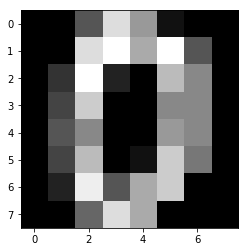

In [13]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

plt.figure()
plt.imshow(np.reshape(X[0,:], (8,8)),cmap='gray') 
plt.show()  

#### Question II.1.1 Building the graph (5pts)

We will start by building the graph representing the data. For this, we will follow the steps below 


__1.__ Center the dataset as $\mathbf{x}_i \leftarrow \mathbf{x}_i - \mathbb{E}_i\mathbf{x}_i$

__2.__ Compute the matrix of pairwise distances between the centered images. You can do this either by hand, noting that $D(\mathbf{x}_i, \mathbf{x}_j) = \|\mathbf{x}_i\|^2 + \|\mathbf{x}_j\|^2 - 2\langle \mathbf{x}_i, \mathbf{x}_j\rangle$ or using a call to the 'pairwise_distances' function from scikit learn. 

__3.__ Once you have the distance matrix, obtain the matrix of scalar products by squaring the distances and applying double centering

$$\mathbf{S} = -\frac{1}{2}(\mathbf{I} - \frac{1}{n}\mathbf{1}\mathbf{1}^T)\mathbf{D}^2(\mathbf{I} - \frac{1}{n}\mathbf{1}\mathbf{1}^T)$$

where $\mathbf{1} = \left[1,1,\ldots,1\right]$ is a vector of all ones and $\mathbf{I}$ is the indentity matrix.

__4.__ Compute the graph representation. The graph $\mathcal{G} = (\mathcal{V}, \mathcal{E})$ si defined on a set of vertices $\mathcal{V}$ and a set of edges between those vertices $\mathcal{E}$. The set of vertices corresponds to the set of images in the original dataset. The set of edges will be defined according to the $K$-rule as explained below.

We will represent the graph through its adjacency matrix $A$ where $A_{ij} = 1$ if we draw an edge between vertex $i$ and vertex $j$. To build this adjacency matrix, we will add an edge between image $\mathbf{x}_i$ and image $\mathbf{x}_j$ whenever $\mathbf{x}_j$ is among the $K$ nearest neighbors of $\mathbf{x}_i$. 




#### Question II.1.2 Computing the geodesic distances (5pts)

__1.__ Once we have the graph representation of the data, we need to compute the shortest path between any two vertices in this graph (shortest geodesic distance between any two images). To do that, connect the vertices that were not connected by the K nearest neighbors approach, with an edge of sufficiently large weight (To avoid having to take huge values, you might want to normalize the distances (resp scalar product) for example by normalizing by the norm of the matrix). You should then have an adjacency matrix $\mathbf{A}$ with $0$ on the diagonal and such that $A_{ij} = 1$ if the two images are connected and $A_{ij} = \inf$ or some large number if they are not.


__2.__ Let us denote the updated adjacency matrix as $\tilde{\mathbf{A}}$. From this matrix, we will now compute the shortest geodesic distance. That can be done through the Floyd-Warshall algorithm as indicated below.


In [ ]:


# code the Floyd Warshall algorithm as follows
# for k = 1 to n
#     for i =1 to n
#         for j = 1 to n
#             \tilde{A}_{ij}\leftarrow \min(A_{ij}, A_{ik + A_{kj}})


#### Question II.1.3 Low dimensional projection (2pts)

To conclude, from the matrix of geodesic distances, compute the low dimensional representation. Do this by

1. First getting the singular value decomposition of the geodesic distance matrix as $\mathbf{S}_\mathcal{G} = \mathbf{U}\mathbf{\Lambda}\mathbf{U}^T$. Define the projection as $\mathbf{I_{P\times N}}\mathbf{\Lambda}^{1/2}\mathbf{U}^T$ with $P=2$ (that is retain the first two rows of the matrix $\mathbf{\Lambda}^{1/2}\mathbf{U}^T$).

2. Represent each image $\mathbf{x}_i$ from the $2$ tuple encoded in the $i^{th}$ column of $\mathbf{I}_{2\times N}\mathbf{\Lambda}^{1/2}\mathbf{U}^T$. Display the result below.


In [ ]:
import numpy as np
import 
import matplotlib.pyplot as plt






### Exercise II.2. (K-means)

#### Question II.2.1 (8pts)

Now that we have a two dimensional representation for the images. We will use a clustering algorithm to learn how to distinguish between the two digits. 


__1.__ Start by splitting the dataset into a training and a validation set (let us take $90\%$ training and $10\%$ validation). 

__2.__ Initialize the $K$-means algorithm with $2$ centroids located at random positions

__3.__ Assign each point to its nearest centroid as 

$$\mathcal{C}(\mathbf{x}_i) \leftarrow \underset{k}{\operatorname{argmin}}  \|\mathbf{x}_i - \mathbf{c}_{k}\|^2$$

__4.__ Update the centroids as 

$$\mathbf{c}_k \leftarrow \frac{1}{N_k}\sum_{\ell\in \mathcal{C}_k}\mathbf{x}_\ell,\quad k=1,2.$$

__5.__ Make sure to properly treat empty clusters. If you end up with an empty cluster, restart the iterations by splitting the single cluter you have into two sub-clusters and define your new centroids as the centers of mass of those clusters. 


In [ ]:
import numpy as np


while 




### Part III. Reinforcement learning (10pts)

In this last exercise, we will tackle a simple reinforcement learning problem. Consider the map given below. There are 5 rooms + the garden. We would like to train an agent to get out of the house as quickly as possible. To set up the evironment, we will consider 6 possible state (the rooms in which the agent is located) and 6 possible actions (moving from one room to any other room). 

The Q-table can thus be encoded by a $6$ by $6$ matrix. We will consider three types of rewards. Impossible moves (example 1 to 4) will be penalized by $1$. possible moves will be associated to a $0$ reward. Finally any move leading to an escape (e.g. 2 to 6) will be rewarded by 100. 




<img src="QLearningImage2.png" width=700 height=600 />


#### Question III.1 (5pts)

As a first approach, we will just run a couple of pure exploration iterations. Just fill out the loop below and run a couple of 

In [ ]:
done = False 

while not done: 
    
    
    '''complete the greedy steps by sampling an action at random and updating the state of the environement
    until the variable Done is not set to True. Set this variable to True when the agent is able to escape the house'''
    
    
    
    
    
    

#### Question III.2 (5pts)

Now that you can solve the greedy approach. We will start to exploit and we will do that through the use of a $Q$ table. In this case, as indicated in the statement of the exercise, the Q-table is 6x6. Train the agent by alternating between exploitation and exploration. 

Since we want to update the $Q$-table, we will now add a line of the form 

$$Q[s, a] \leftarrow (1-\alpha)Q[s,a] + \alpha\left(R[a] + \gamma\max_{a'}Q[s',a']\right)$$

When in the exploration framework, we will sample the action at random as in Question III.1. When in the exploitation framework however, we will simply choose the action as the one that maximizes the entry in the $Q$-table for the particular state at which we are. Hence we have $a^* = \underset{a}{\operatorname{argmax}} Q[s,a]$. 


Code this epsilon-greedy approach below. You can start $\epsilon =0.8$ 
Take a sufficiently small learning rate (you can for example start with 0.5) and a relatively large discount factor $\gamma=0.9$ (You can later change those values to see how they affec the learning)

Once you are done with the algorithm, try a couple of different values for $\epsilon$ and describe the evolution in the learning. 

In [ ]:
done = False 

epsilon = 0
gamma = 0
alpha = 0

for episode in range(NumEpisodes):

    done =False 
    
    while not done: 
    
    
    '''Draw a number at random from the uniform distribution between 0 and 1''' 
    
    
    '''If the number is less then epsilon, explore if it is larger, exploit'''
    
    if randomDraw < epsilon:
        
        # exploration
        
        '''update the Q-table'''
        
    else:
        
        # exploitation
        
        '''update the Q-table'''
        
        
        